# First Exploration

## Introduction

In this notebook, a preliminary exploration of the dataset will be conducted to gain insights into the various variables it contains. The main objective is to understand what each variable describes, its significance, and the distributions of the data.

By examining the characteristics and relationships of the variables, a foundation will be established for more detailed analyses in subsequent steps. Visualizations and summary statistics will be utilized to illustrate the distribution patterns and identify any notable trends or anomalies within the dataset.

This exploration serves as a crucial first step in the data analysis process, allowing for informed decisions in later stages of modeling and interpretation.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "../census_income/utils/pandas_explorer.py"
%run "../census_income/utils/pandas_missing_handler.py"

## Data load and first visualization:

In [3]:
path = '../census_income/data/adult.data'
data = pd.read_csv(path)
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Setting the column names:

In [26]:
columns_info = {
    'age': 'continuous',
    'workclass': 'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked',
    'fnlwgt': 'continuous',
    'education': 'Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, doctorate, 5th-6th, Preschool',
    'education_num': 'continuous',
    'marital_status': 'Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse',
    'occupation':" Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, machine_op_inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    'relationship': 'Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
    'race': 'White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black',
    'gender': 'Female, Male',
    'capital_gain': 'continuous',
    'capital_loss': 'continuous',
    'hours_per_week': 'continuous',
    'native_country': 'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, dominican_Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands',
    'income':'<=50k,>50k'
}
data.columns = columns_info.keys()
data.to_csv('../census_income/data/cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Getting some basic information about the dataset:


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [6]:
print(data.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Looking for missing values:


In [7]:
data.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
age,0,0,0,0,0,0,0,0,0,0,0
workclass,0,0,0,0,0,0,0,0,0,0,0
fnlwgt,0,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0,0
education_num,0,0,0,0,0,0,0,0,0,0,0
marital_status,0,0,0,0,0,0,0,0,0,0,0
occupation,0,0,0,0,0,0,0,0,0,0,0
relationship,0,0,0,0,0,0,0,0,0,0,0
race,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0


- It look like the dataset doesn't have missing values.

## Exploring features one by one:


### Age:

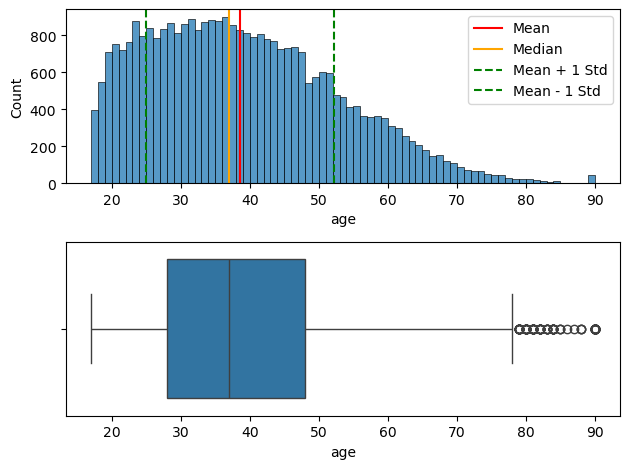

(None,
 age
 36    898
 31    888
 34    886
 23    877
 35    876
      ... 
 83      6
 88      3
 85      3
 86      1
 87      1
 Name: count, Length: 73, dtype: int64)

In [8]:

plt.tight_layout()
data.explorer.numerical_dist('age',data['age'].value_counts().count())

- The distribution has a positive skew with some outliers.

### WorkClass:

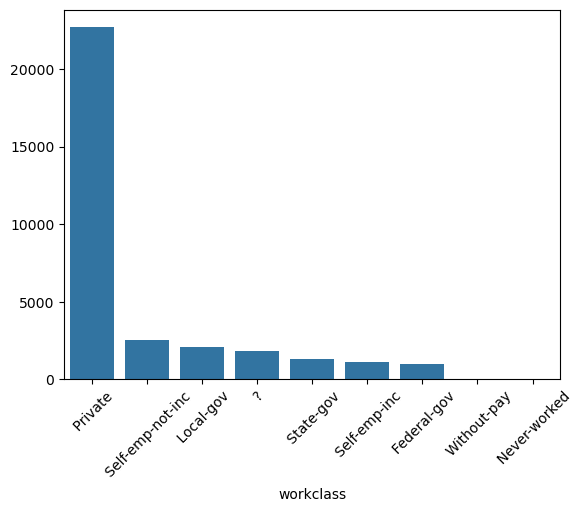

(None,
 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
 Name: count, dtype: int64)

In [9]:
data.explorer.categorical_dist('workclass',45)

- The number of records in the 'Private' class is much larger than in the others.
- There is a class labeled '?', and it is necessary to find out what it means.

### Fnlwgt:

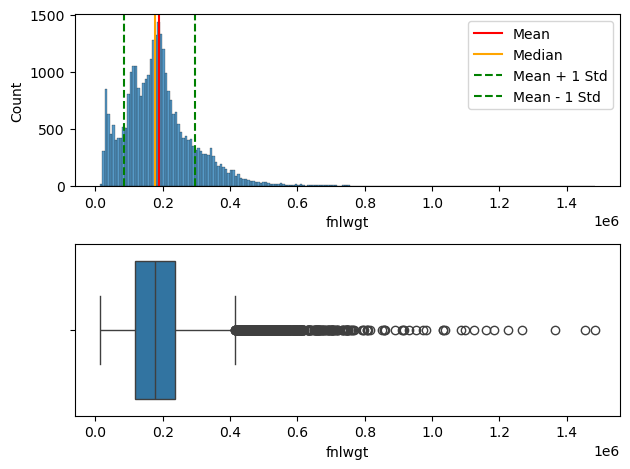

(None,
 fnlwgt
 164190    13
 203488    13
 123011    13
 148995    12
 126675    12
           ..
 325573     1
 140176     1
 318264     1
 329205     1
 257302     1
 Name: count, Length: 21647, dtype: int64)

In [10]:
data.explorer.numerical_dist('fnlwgt')

- The distribution exhibits a positive skew.
- The boxplot reveals many outliers on the positive side of the distribution.

### Education:

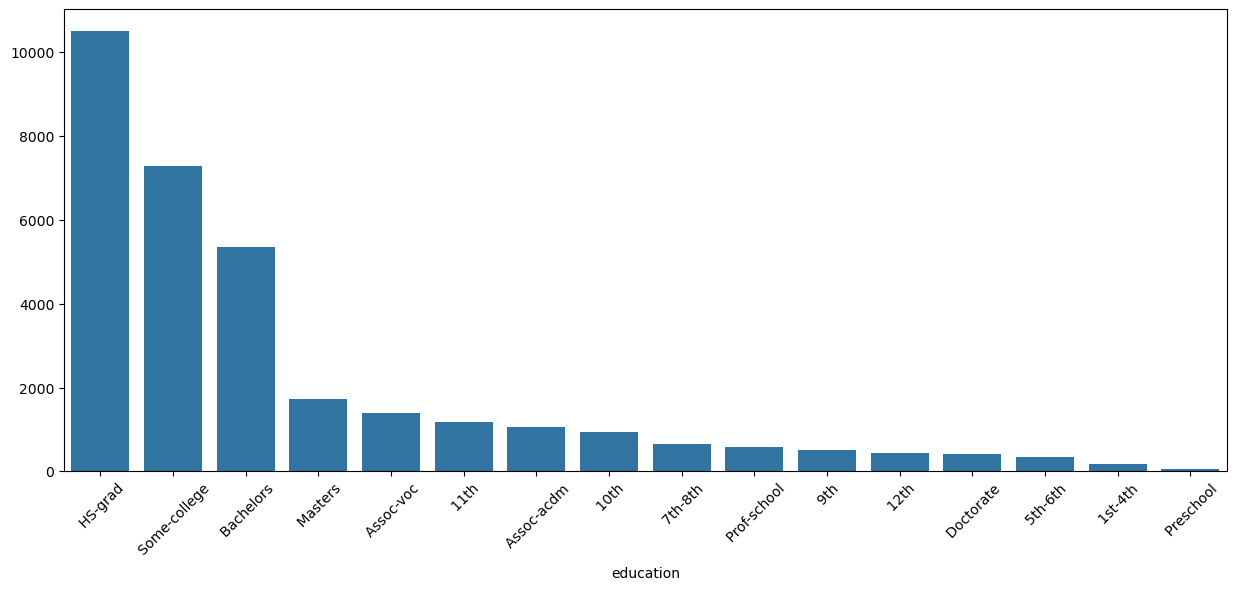

(None,
 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
 Name: count, dtype: int64)

In [11]:
plt.figure(figsize=(15,6))
data.explorer.categorical_dist('education',45)

- The distribution shows a much larger number of records for the HS-grad, Some-college, and Bachelors classes.

### Education_num:

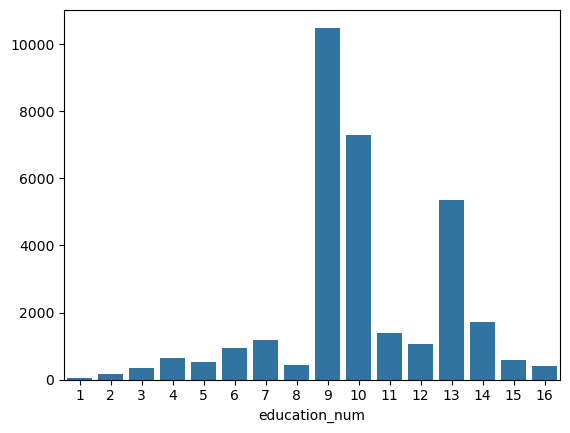

(None,
 education_num
 9     10501
 10     7291
 13     5354
 14     1723
 11     1382
 7      1175
 12     1067
 6       933
 4       646
 15      576
 5       514
 8       433
 16      413
 3       333
 2       168
 1        51
 Name: count, dtype: int64)

In [12]:
data.explorer.categorical_dist('education_num')

- The distribution shows a much larger amount of records for the 9,10, and 13 classes.

### Marital_status:

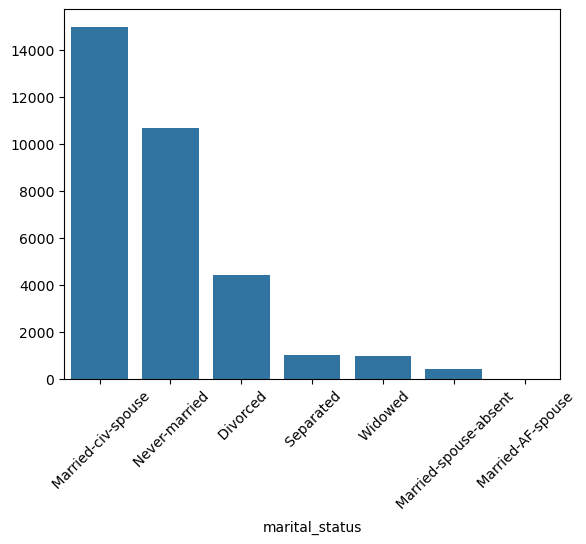

(None,
 marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
 Name: count, dtype: int64)

In [13]:
data.explorer.categorical_dist('marital_status',45)

- The distribution shows a much larger number of records for the 'Married-civ-spouse' and 'Never-married' classes.


### Occupation:

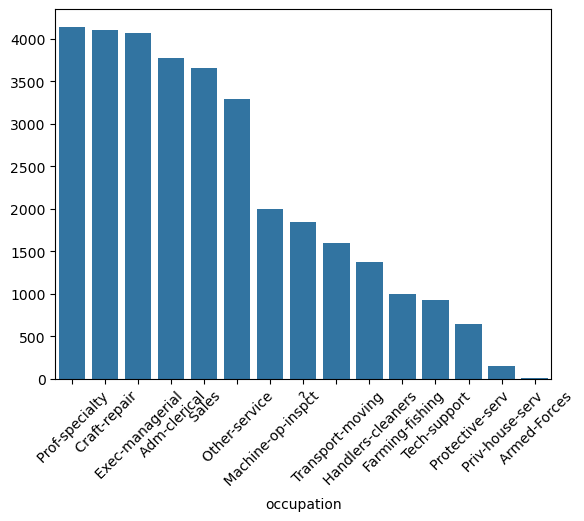

(None,
 occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 Name: count, dtype: int64)

In [14]:
data.explorer.categorical_dist('occupation',45)

- This feature has a class labeled with '?'; it is necessary to find out what it means.

### Relationship:

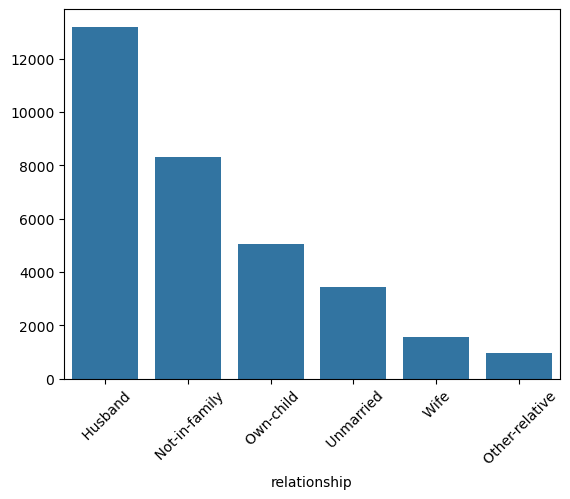

(None,
 relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
 Name: count, dtype: int64)

In [15]:
data.explorer.categorical_dist('relationship',45)

- The distribution shows a larger amount of records for the 'Husband' class.

### Race:

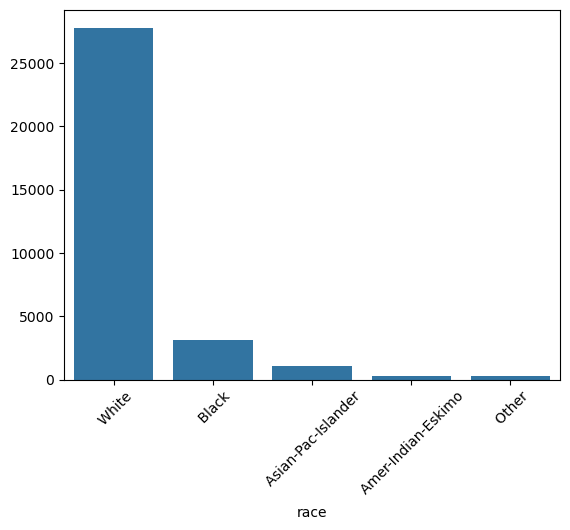

(None,
 race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: count, dtype: int64)

In [16]:
data.explorer.categorical_dist('race',45)

- The distriution shows a much larger amount of records for the 'White' class.

### Gender:

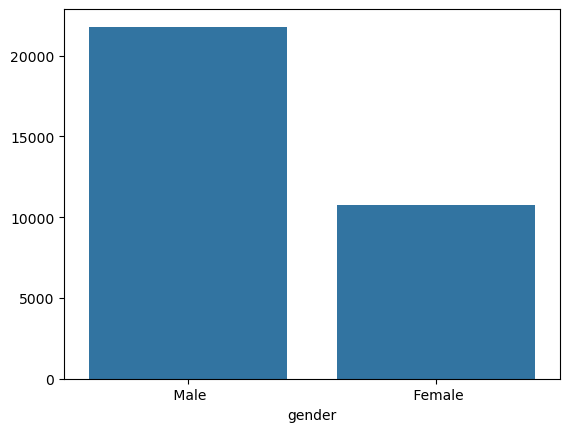

(None,
 gender
 Male      21789
 Female    10771
 Name: count, dtype: int64)

In [17]:
data.explorer.categorical_dist('gender')

- The distribution shows that the number of records for the 'Male' class is more than double the number of records for the 'Female' class.

### Capital gain:

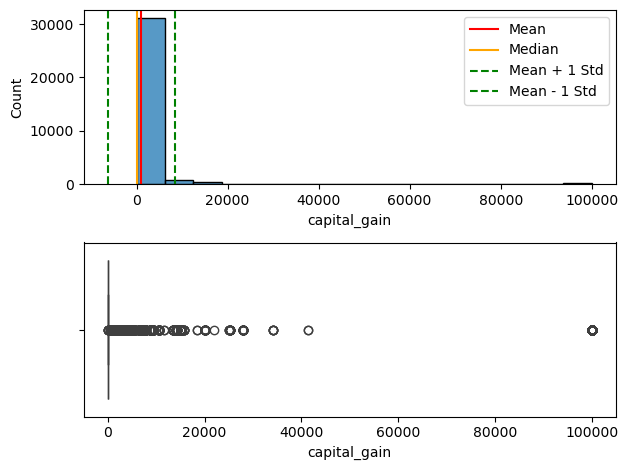

(None,
 capital_gain
 0        29849
 15024      347
 7688       284
 7298       246
 99999      159
          ...  
 1111         1
 2538         1
 22040        1
 4931         1
 5060         1
 Name: count, Length: 119, dtype: int64)

In [18]:
data.explorer.numerical_dist('capital_gain')

- The distribution shows 29849 records with a value of 0 for capital gain; it is necessary to find out what it means.

### Capital loss:

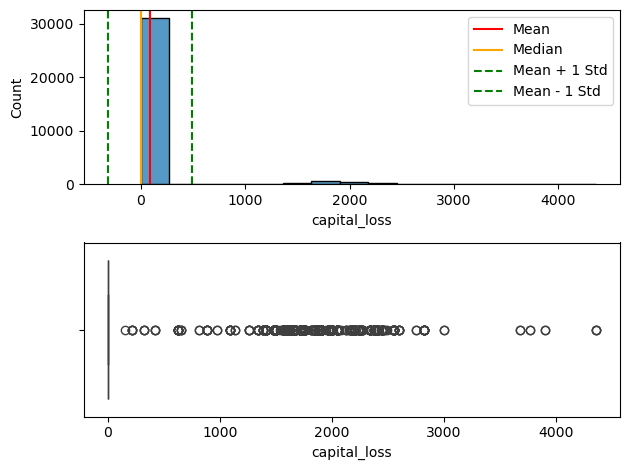

(None,
 capital_loss
 0       31041
 1902      202
 1977      168
 1887      159
 1848       51
         ...  
 2080        1
 1539        1
 1844        1
 2489        1
 1411        1
 Name: count, Length: 92, dtype: int64)

In [19]:
data.explorer.numerical_dist('capital_loss')

- The distribution shows 31041 records with a value of 0 for capital loss; it is necessary to find out what it means.

In [20]:
zero_gain_filt = data['capital_gain'] == 0
zero_loss_filt = data['capital_loss'] == 0

print(f'The amount of record wich have 0 gains and 0 losses is: {data[zero_gain_filt & zero_loss_filt].shape[0]}')

The amount of record wich have 0 gains and 0 losses is: 28330


- There are 28,330 records with 0 gains and 0 losses; it may make sense to think that these people don't engage in any kind of investments.

### Hours per week:

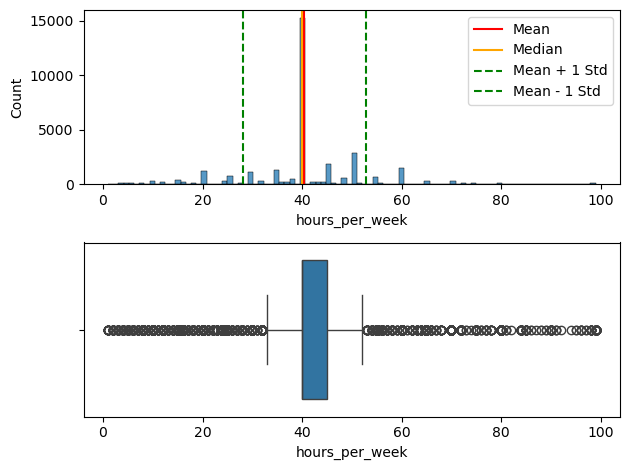

(None,
 hours_per_week
 40    15216
 50     2819
 45     1824
 60     1475
 35     1297
       ...  
 82        1
 94        1
 92        1
 74        1
 87        1
 Name: count, Length: 94, dtype: int64)

In [25]:
data.explorer.numerical_dist('hours_per_week',bins=data['hours_per_week'].value_counts().count())

- The distribution shows a concentration of records in the middle and numerous outliers on both sides.

### Native Country:

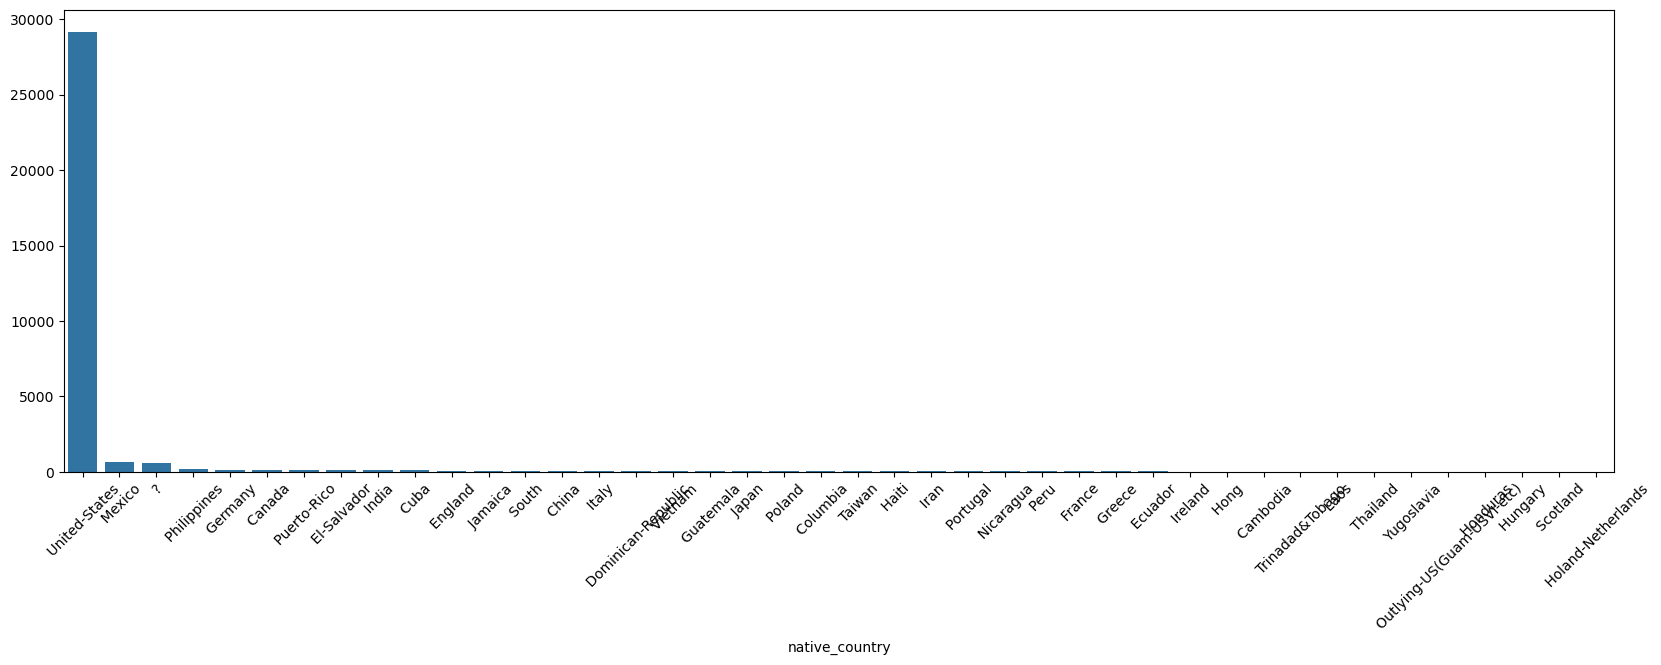

(None,
 native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru          

In [22]:
plt.figure(figsize=(20,6))
data.explorer.categorical_dist('native_country',45)

- The distribution shows a much larger amount of records for United-States wich is normal.
- The variale has a class labeled with '?' it is necessary to find out what it means.

### Income:

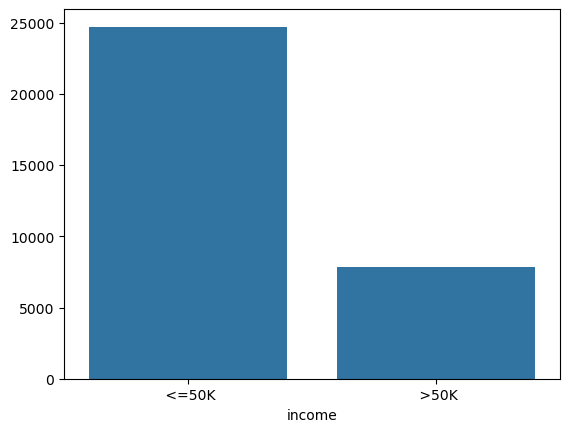

(None,
 income
 <=50K    24719
 >50K      7841
 Name: count, dtype: int64)

In [23]:
data.explorer.categorical_dist('income')

- The distribution shows a much larger number of records for the '<=50K' class.
- The distribution is unbalanced, which is not ideal for some machine learning algorithms.

In [24]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Conclusions

In this initial exploration of the dataset, several key insights have been gained regarding the variables and their distributions:

1. **Variable Understanding**: Each variable was examined to clarify its meaning and relevance within the context of the dataset. Notable relationships and potential implications were identified.

2. **Distribution Patterns**: The distributions of various variables revealed significant patterns, such as skewness, outliers, and concentrations of records in specific ranges. These observations are essential for understanding the data's characteristics.

3. **Data Quality**: Initial checks indicated areas for further investigation, including missing values or anomalies that may require attention before proceeding with more advanced analyses.

4. **Next Steps**: The findings from this exploration will inform subsequent modeling efforts. Potential relationships and patterns observed may guide feature selection and influence the choice of machine learning algorithms.
